# 7 链表

## 7.1 相交链表

给你两个单链表的头节点 headA 和 headB ，请你找出并返回两个单链表相交的起始节点。如果两个链表不存在相交节点，返回 null 。

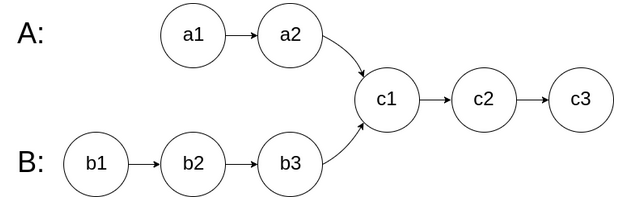

In [ ]:
# Definition for singly-linked list.
# class ListNode:
#     def __init__(self, x):
#         self.val = x
#         self.next = None

class Solution:
    def getIntersectionNode(self, headA: ListNode, headB: ListNode) -> Optional[ListNode]:
        p1,p2 = headA,headB

        while p1 != p2:
            p1 = p1.next if p1 else headB
            p2 = p2.next if p2 else headA

            # 循环结束只出现两种情况：
            # 1.p1=p2=c1（相交节点）→返回c1
            # 2.p1=p2=None（都走到头）→返回None
        return p1

## 7.2 反转链表

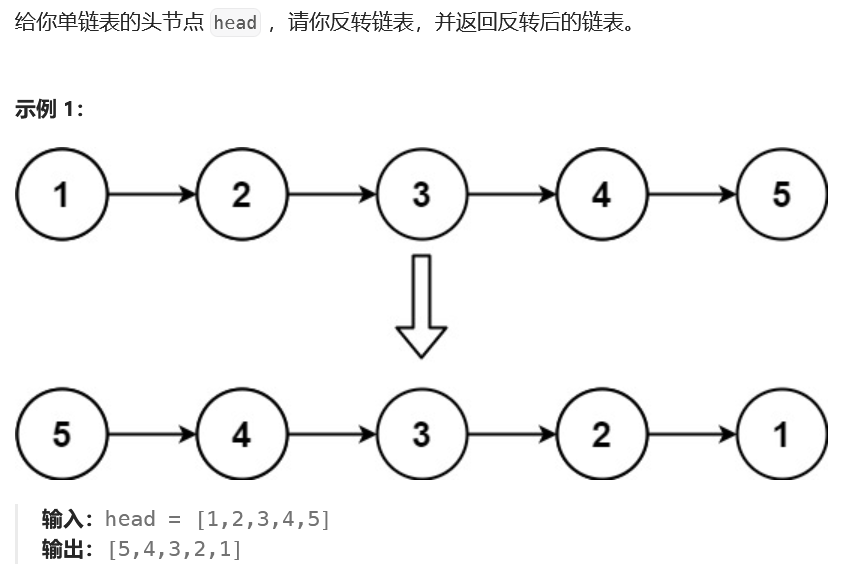

In [ ]:
# Definition for singly-linked list.
# class ListNode:
#     def __init__(self, val=0, next=None):
#         self.val = val
#         self.next = next
class Solution:
    def reverseList(self, head: Optional[ListNode]) -> Optional[ListNode]:
        # 初始化双指针
        left = head
        right = None

        while left is not None:
            # 步骤1：保存当前节点的下一个节点（防止丢失后续链表）
            temp = left.next
            # 步骤2：反转当前节点的指向（让它指向前一个节点）
            left.next = right
            # 步骤3：双指针后移，准备处理下一个节点
            right = left
            left = temp
        return right

## 7.3 回文链表

给你一个单链表的头节点 head ，请你判断该链表是否为。如果是，返回 true ；否则，返回 false 。

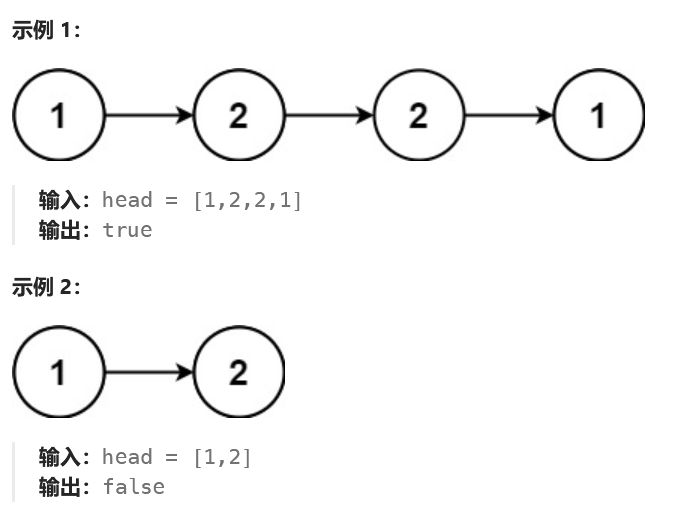

In [ ]:
# Definition for singly-linked list.
# class ListNode:
#     def __init__(self, val=0, next=None):
#         self.val = val
#         self.next = next
class Solution:
    def isPalindrome(self, head: Optional[ListNode]) -> bool:
        # 空链表或单个节点，直接是回文
        if not head or not head.next:
            return True
        
        # 1. 快慢指针找到链表中点
        slow = head
        fast = head
        while fast.next and fast.next.next:
            slow = slow.next
            fast = fast.next.next
        
        # 2. 反转后半部分链表
        def reverse_list(node):
            prev = None
            cur = node
            while cur:
                next_node = cur.next
                cur.next = prev
                prev = cur
                cur = next_node
            return prev
        
        # 反转后半段，slow.next是后半段起点
        right_head = reverse_list(slow.next)
        left_head = head
        
        # 3. 比对前后两段节点值
        while right_head:
            if left_head.val != right_head.val:
                return False
            left_head = left_head.next
            right_head = right_head.next
        
        return True

## 7.4 环形链表

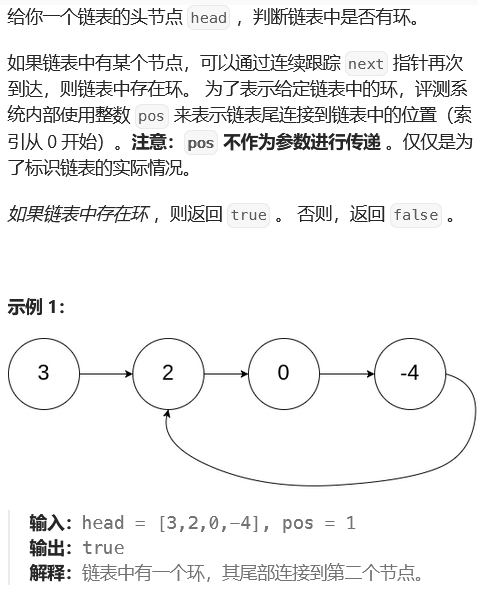

In [ ]:
# Definition for singly-linked list.
# class ListNode:
#     def __init__(self, x):
#         self.val = x
#         self.next = None

class Solution:
    def hasCycle(self, head: Optional[ListNode]) -> bool:
        # 初始化快慢指针，都指向头节点
        slow = head
        fast = head
        
        # 循环条件：快指针和快指针的下一个节点都不为空（避免空指针异常）
        while fast and fast.next:
            slow = slow.next       # 慢指针走1步
            fast = fast.next.next  # 快指针走2步
            
            # 指针相遇，说明存在环
            if slow == fast:
                return True
        
        # 快指针走到链表尾部，无环
        return False

## 7.5 环形链表2

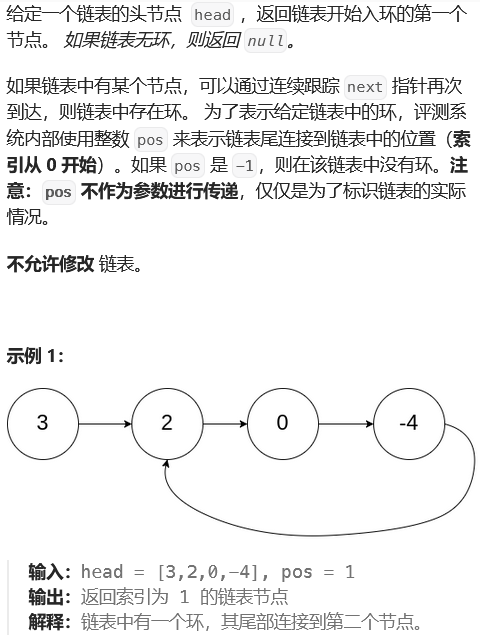

In [ ]:
# Definition for singly-linked list.
# class ListNode:
#     def __init__(self, x):
#         self.val = x
#         self.next = None

class Solution:
    def detectCycle(self, head: Optional[ListNode]) -> Optional[ListNode]:
        # 初始化快慢指针，均指向头节点
        slow = head
        fast = head
        
        # 第一步：快慢指针遍历，寻找相遇点，判断是否有环
        while fast and fast.next:
            slow = slow.next       # 慢指针每次走1步
            fast = fast.next.next  # 快指针每次走2步
            # 两指针相遇，说明存在环
            if slow == fast:
                # 第二步：将慢指针重置为头节点，双指针同步走1步，相遇即为入口
                slow = head
                while slow != fast:
                    slow = slow.next
                    fast = fast.next
                return slow
        
        # 循环结束未相遇，说明无环
        return None


## 7.6 合并两个有序链表

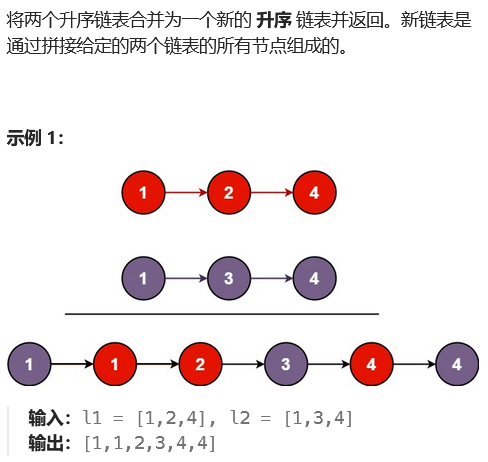

In [ ]:
# Definition for singly-linked list.
# class ListNode:
#     def __init__(self, val=0, next=None):
#         self.val = val
#         self.next = next
class Solution:
    def mergeTwoLists(self, list1: Optional[ListNode], list2: Optional[ListNode]) -> Optional[ListNode]:
        # 创建虚拟头节点，避免处理头节点的边界情况
        dummy = ListNode()
        # 工作指针，指向当前新链表的末尾
        cur = dummy

        # 同时遍历两个链表，直到其中一个遍历完成
        while list1 and list2:
            if list1.val < list2.val:
                # 拼接较小值节点
                cur.next = list1
                # 移动原链表指针
                list1 = list1.next
            else:
                cur.next = list2
                list2 = list2.next
            # 移动新链表末尾指针
            cur = cur.next

        # 拼接剩余未遍历完的链表（最多只有一个链表有剩余节点）
        cur.next = list1 if list1 else list2

        # 虚拟头节点的下一个节点就是合并后的链表头
        return dummy.next
